#Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading model

In [8]:
cnn = tf.keras.models.load_model("/content/trained_model (1).h5")

#visualization and performing prediction on simgle image

In [9]:
test_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/foodrecog/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 146 files belonging to 15 classes.


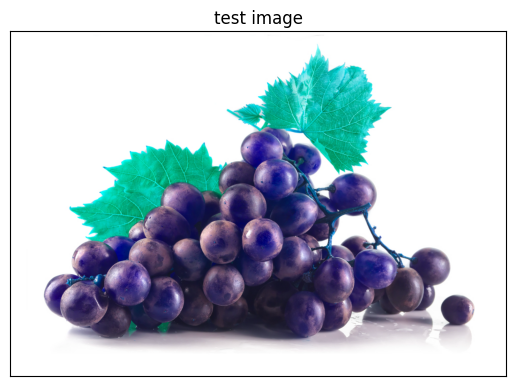

In [10]:

import cv2
image_path='/content/drive/MyDrive/foodrecog/test/grapes/Image_1.jpg'
img=cv2.imread(image_path)
plt.imshow(img)
plt.title('test image')
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model

In [11]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])#convertig single image to batch
predictions=cnn.predict(input_arr)

1/1 [==============================] - 0s 254ms/step


In [12]:
print(predictions[0])
print(max(predictions[0]))

[5.21688635e-05 1.13613005e-05 1.37783680e-03 3.86149222e-05
 2.13273711e-06 1.84784458e-05 5.34719811e-06 3.23489017e-04
 1.66329883e-05 6.98440408e-06 8.14958985e-05 3.20402347e-02
 1.06807593e-02 7.74285509e-05 9.38463092e-01 1.05132145e-04
 1.06314816e-04 3.66299474e-07 1.89416530e-03 1.81328721e-06
 1.93951026e-04 3.35175123e-08 7.31948530e-05 5.09634847e-05
 4.43212048e-06 6.97401469e-04 5.01139788e-04 1.94012176e-03
 2.10305298e-04 1.43526442e-04 1.08417895e-04 2.79885649e-06
 2.76156243e-06 6.14320754e-07 1.07267005e-02 3.98442608e-05]
0.9384631


In [13]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes']

In [14]:
result_index=np.where(predictions[0] == max(predictions[0]))

In [15]:
print(result_index)

(array([14]),)


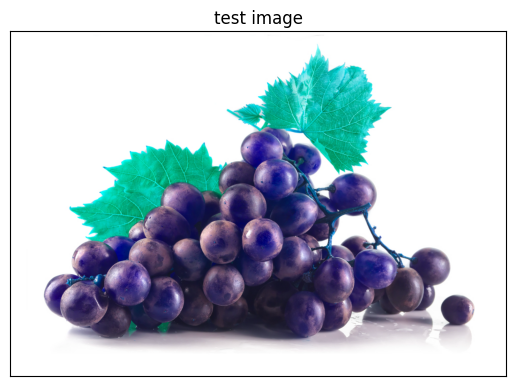

In [16]:
#display image
plt.imshow(img)
plt.title('test image')
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
#single prediction
print("it is a {}".format(test_set.class_names[result_index[0][0]]))

it is a grapes
